# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/Harshit Srivastava/OneDrive/Desktop/Internship/earthquake_alert_balanced_dataset.csv')
data.head(100)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
95,6.8,112.0,6.0,6.0,67.0,green
96,6.5,2.0,7.0,8.0,40.0,green
97,6.6,107.0,4.0,6.0,-97.0,green
98,6.8,96.0,4.0,6.0,-30.0,green


In [3]:
data.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


<Axes: xlabel='sig', ylabel='alert'>

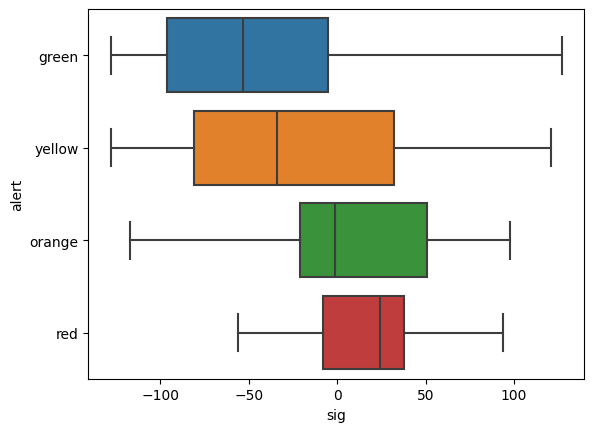

In [4]:
sns.boxplot(x=data['sig'],y=data['alert'])

<Axes: xlabel='depth', ylabel='alert'>

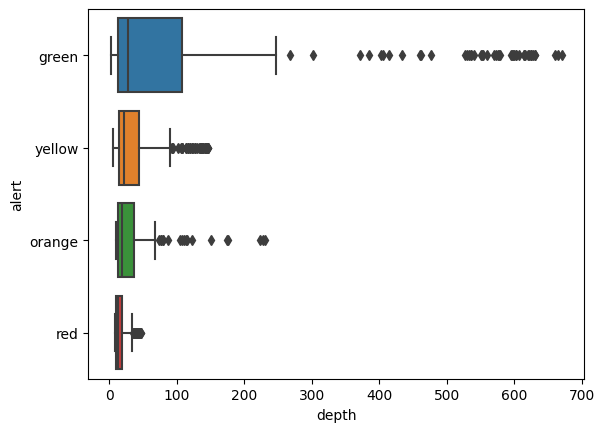

In [5]:
sns.boxplot(x=data['depth'],y=data['alert'])

In [6]:
data.shape

(1300, 6)

In [7]:
data = data.drop_duplicates()
data.shape

(1256, 6)

<Axes: xlabel='alert', ylabel='count'>

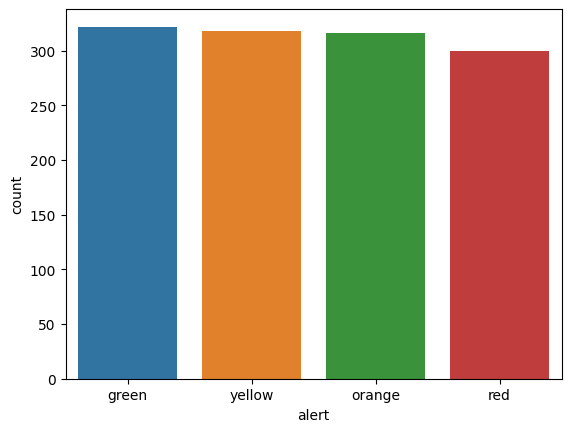

In [8]:
sns.countplot(x='alert',data=data)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1256 non-null   float64
 1   depth      1256 non-null   float64
 2   cdi        1256 non-null   float64
 3   mmi        1256 non-null   float64
 4   sig        1256 non-null   float64
 5   alert      1256 non-null   object 
dtypes: float64(5), object(1)
memory usage: 68.7+ KB


In [10]:
X=data.drop('alert',axis=1)
y=data['alert']
X,y

(      magnitude  depth  cdi  mmi    sig
 0          7.00   14.0  8.0  7.0    0.0
 1          6.90   25.0  4.0  4.0  -33.0
 2          7.00  579.0  3.0  3.0  -13.0
 3          7.30   37.0  5.0  5.0   65.0
 4          6.60  624.0  0.0  2.0  -98.0
 ...         ...    ...  ...  ...    ...
 1295       6.87   11.0  9.0  7.0   13.0
 1296       7.85   93.0  8.0  6.0  -51.0
 1297       7.48  142.0  7.0  6.0  120.0
 1298       7.04   51.0  7.0  6.0 -115.0
 1299       6.50    9.0  9.0  8.0  -29.0
 
 [1256 rows x 5 columns],
 0        green
 1        green
 2        green
 3        green
 4        green
          ...  
 1295    yellow
 1296    yellow
 1297    yellow
 1298    yellow
 1299    yellow
 Name: alert, Length: 1256, dtype: object)

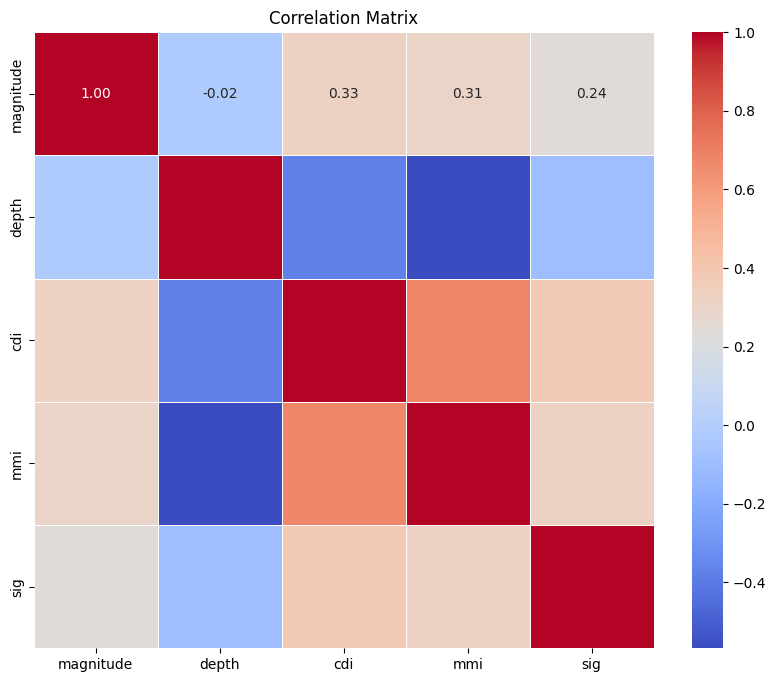

In [11]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(data['alert'])
y_encoded

array([0, 0, 0, ..., 3, 3, 3])

In [13]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [14]:
for i, class_label in enumerate(le.classes_):
    print(f"{class_label} → {i}")


green → 0
orange → 1
red → 2
yellow → 3


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43689245e-01, -3.52519257e-01,  4.63322547e-01,
         6.01506748e-02,  1.66882250e-01],
       [-3.80035097e-01, -2.48606177e-01, -1.31901473e+00,
        -2.14031285e+00, -3.62421048e-01],
       [-1.43689245e-01,  4.98483439e+00, -1.76459904e+00,
        -2.87380069e+00, -4.16311704e-02],
       ...,
       [ 9.90770842e-01,  8.56651126e-01,  1.77382292e-02,
        -6.73337166e-01,  2.09162151e+00],
       [-4.91509048e-02, -2.99344280e-03,  1.77382292e-02,
        -6.73337166e-01, -1.67765955e+00],
       [-1.32541850e+00, -3.99752475e-01,  9.08906866e-01,
         7.93638515e-01, -2.98263072e-01]])

In [16]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


# Model Traning

## Baseline Model Training

### Logistic regression

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [19]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [20]:
log_pred = log_reg.predict(X_test)
log_pred

array([2, 2, 3, 2, 2, 1, 0, 3, 1, 2, 1, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 3, 0, 0, 3, 3, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 3, 0, 3, 0, 2, 0, 2, 2, 3, 3, 1, 3, 3,
       3, 1, 0, 1, 3, 0, 2, 0, 3, 3, 1, 3, 2, 2, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 1, 2, 3, 0, 3, 3, 3, 2, 0, 0, 2, 2, 3, 2, 2, 3, 3, 1, 3, 2, 0,
       2, 2, 2, 3, 3, 0, 0, 2, 3, 3, 1, 1, 3, 2, 3, 0, 0, 2, 2, 3, 1, 2,
       1, 1, 3, 3, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 3, 3, 2, 1, 2, 2, 1,
       0, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 1, 1, 2, 3, 0, 3, 0, 1,
       3, 1, 0, 2, 0, 2, 3, 2, 3, 0, 3, 3, 0, 2, 2, 1, 0, 2, 0, 0, 0, 3,
       2, 3, 3, 2, 3, 1, 0, 3, 0, 3, 1, 2, 2, 1, 1, 1, 0, 2, 3, 3, 3, 0,
       1, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, log_pred)
mae

0.6468253968253969

In [22]:
mat = confusion_matrix(y_test, log_pred)
mat

array([[51,  1,  1, 12],
       [ 0, 28, 16, 19],
       [ 0, 10, 50,  0],
       [ 9, 14,  5, 36]], dtype=int64)

In [23]:
print("\nClassification Report:\n", classification_report(y_test, log_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        65
           1       0.53      0.44      0.48        63
           2       0.69      0.83      0.76        60
           3       0.54      0.56      0.55        64

    accuracy                           0.65       252
   macro avg       0.65      0.66      0.65       252
weighted avg       0.65      0.65      0.65       252



### Decision Tree

In [24]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

In [25]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
clftree_pred= clftree.predict(X_test)
clftree_pred

array([2, 2, 3, 3, 2, 1, 0, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 3, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 3, 1, 3, 2, 2, 3, 3, 2, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 0, 3, 0, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 3, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 0, 2,
       3, 1, 3, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 0, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 3, 0,
       2, 0, 3, 3, 3, 2, 1, 1, 2, 0])

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, clftree_pred)
mae

0.2619047619047619

In [28]:
mat = confusion_matrix(y_test, clftree_pred)
mat

array([[51,  2,  1, 11],
       [ 5, 55,  1,  2],
       [ 0,  0, 59,  1],
       [ 4,  2,  2, 56]], dtype=int64)

In [29]:
print("\nClassification Report:\n", classification_report(y_test, clftree_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        65
           1       0.93      0.87      0.90        63
           2       0.94      0.98      0.96        60
           3       0.80      0.88      0.84        64

    accuracy                           0.88       252
   macro avg       0.88      0.88      0.88       252
weighted avg       0.88      0.88      0.88       252



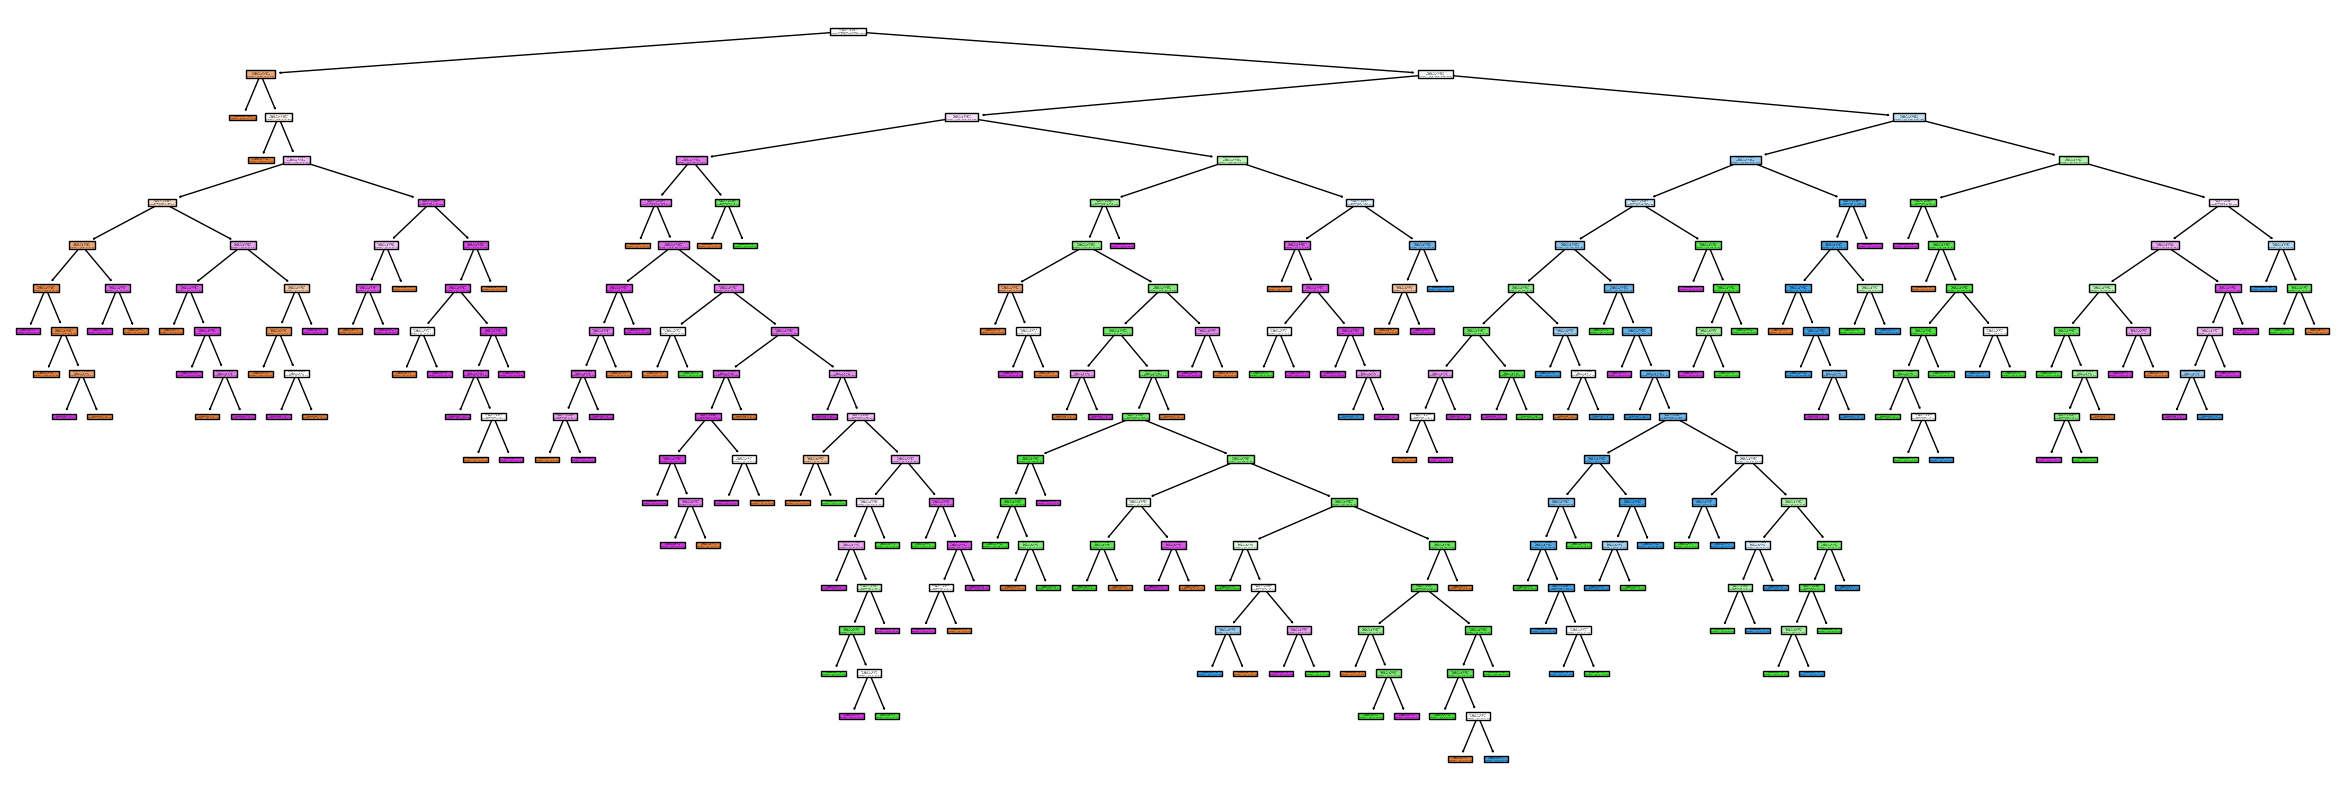

In [30]:
fig=plt.figure(figsize=(30,10))
tree.plot_tree(clftree,filled=True)
plt.show()

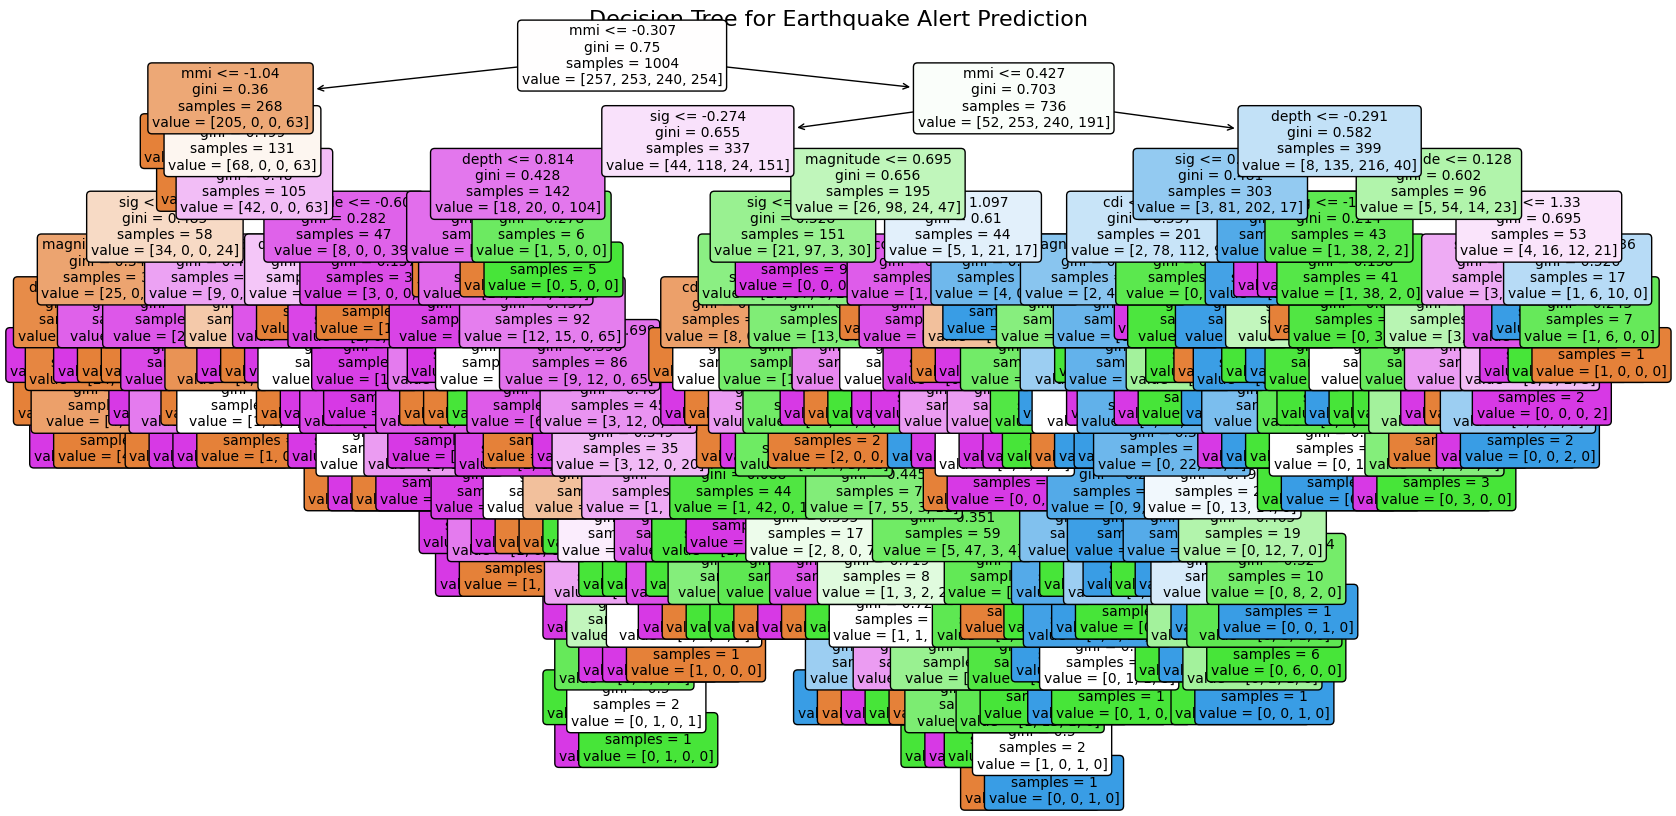

In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    clftree,
    feature_names=X.columns,
    #class_names=clftree.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Earthquake Alert Prediction", fontsize=16)
plt.show()


# Advanced Model Training

## Random Forest

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [33]:

rf_clf = RandomForestClassifier(
    n_estimators=200,        # number of trees in the forest
    max_depth=None,          # let trees grow fully (can tune later)
    class_weight="balanced", # handle class imbalance
    random_state=42,
    n_jobs=-1                # use all CPU cores for speed
)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [34]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([2, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Confusion Matrix:
 [[55  0  1  9]
 [ 0 61  1  1]
 [ 0  0 60  0]
 [ 2  1  2 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        65
           1       0.98      0.97      0.98        63
           2       0.94      1.00      0.97        60
           3       0.86      0.92      0.89        64

    accuracy                           0.93       252
   macro avg       0.94      0.93      0.93       252
weighted avg       0.94      0.93      0.93       252



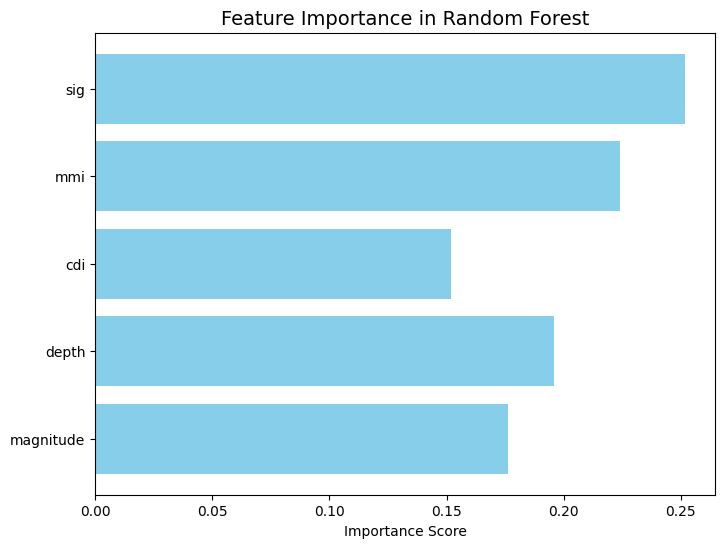

In [36]:
importances = rf_clf.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(X.columns, importances, color="skyblue")
plt.title("Feature Importance in Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.show()

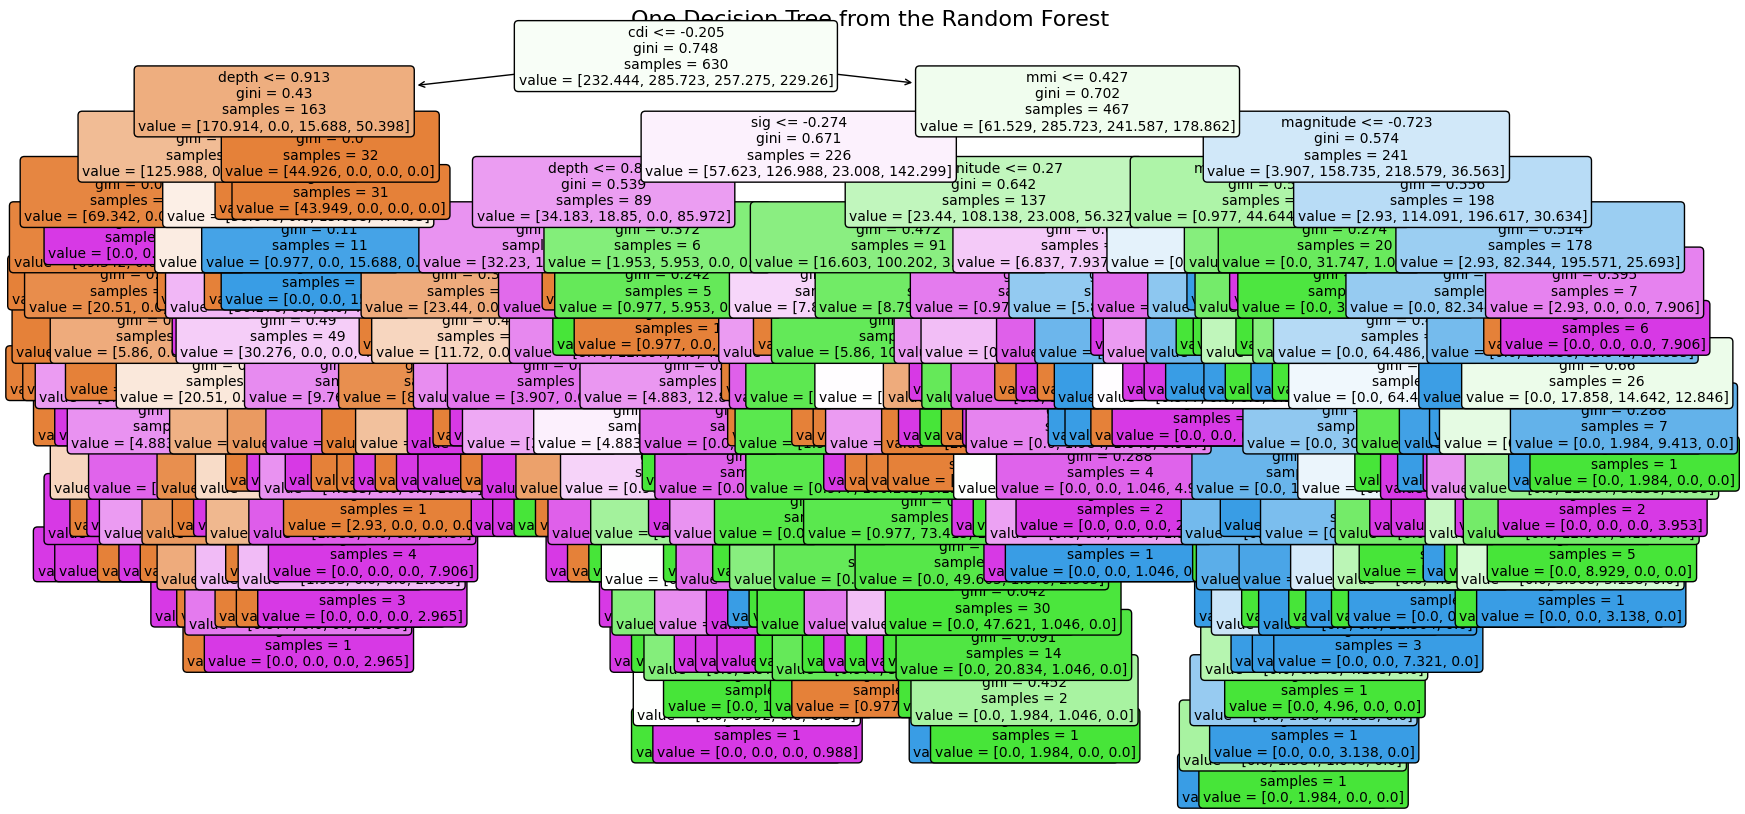

In [37]:
estimator = rf_clf.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    #class_names=rf_clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("One Decision Tree from the Random Forest", fontsize=16)
plt.show()


## Gradient Boosting

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


gb_clf = GradientBoostingClassifier(
    n_estimators=300,       # number of boosting stages (trees)
    learning_rate=0.05,     # step size shrinkage
    max_depth=None,            # depth of individual trees
    random_state=42
)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=None, n_estimators=300,
                           random_state=42)

In [39]:
gb_pred = gb_clf.predict(X_test)
gb_pred

array([2, 1, 3, 3, 2, 1, 0, 0, 3, 1, 1, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 3, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 0,
       2, 3, 3, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 1, 3, 1, 2,
       3, 1, 3, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 3, 3, 2, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))


Confusion Matrix:
 [[57  0  0  8]
 [ 2 60  0  1]
 [ 0  4 56  0]
 [ 3  4  1 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        65
           1       0.88      0.95      0.92        63
           2       0.98      0.93      0.96        60
           3       0.86      0.88      0.87        64

    accuracy                           0.91       252
   macro avg       0.91      0.91      0.91       252
weighted avg       0.91      0.91      0.91       252



## XGBOOST

In [41]:
from xgboost import XGBClassifier, plot_importance

xgb_clf = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.05,      # step size shrinkage
    max_depth=None,             # depth of trees
    subsample=0.8,           # subsample ratio of training instances
    colsample_bytree=0.8,    # subsample ratio of columns per tree
    objective="multi:softmax", # multi-class classification
    num_class=len(y.unique()), # number of classes
    random_state=42,
    use_label_encoder=True,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

d:\Internship\Evenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:34:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [42]:
XG_pred = xgb_clf.predict(X_test)
XG_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 1, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Confusion Matrix:
 [[59  0  1  5]
 [ 0 60  1  2]
 [ 0  1 59  0]
 [ 1  3  1 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        65
           1       0.94      0.95      0.94        63
           2       0.95      0.98      0.97        60
           3       0.89      0.92      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



<Figure size 800x600 with 0 Axes>

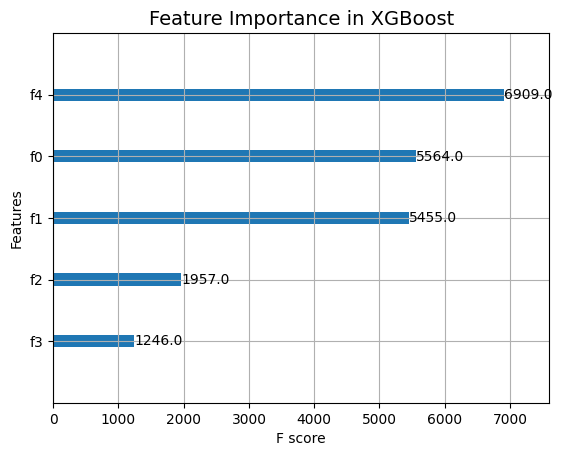

In [44]:
plt.figure(figsize=(8,6))
plot_importance(xgb_clf, importance_type="weight")
plt.title("Feature Importance in XGBoost", fontsize=14)
plt.show()

# Hyperparameter Tuning

## Random Forest

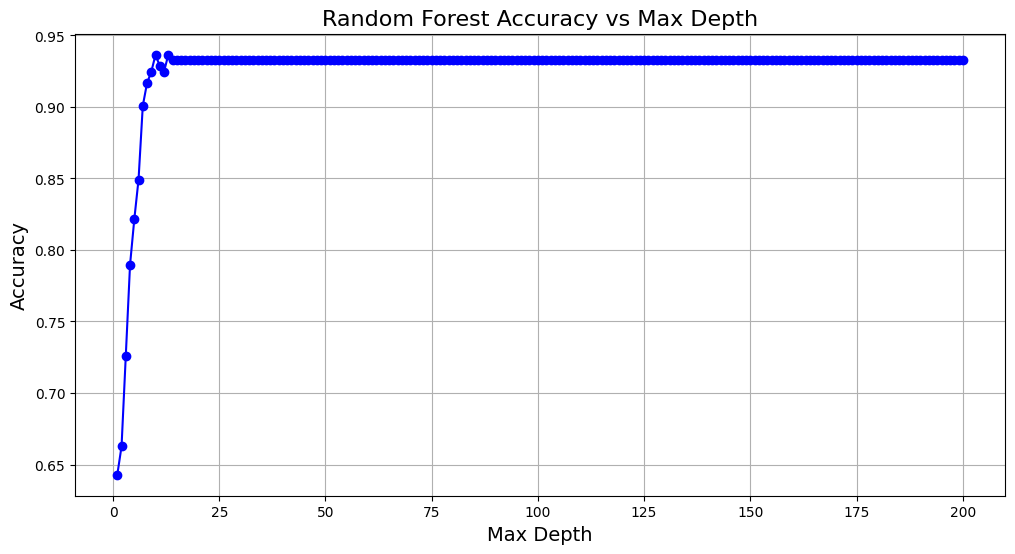

In [45]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


depths = range(1, 201)   
accuracies = []

for d in depths:
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        max_depth=d,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="blue")
plt.title("Random Forest Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

In [46]:
best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")


Best accuracy: 0.9365 at max_depth = 10


Best accuracy: 0.9444 at n_estimators = 80


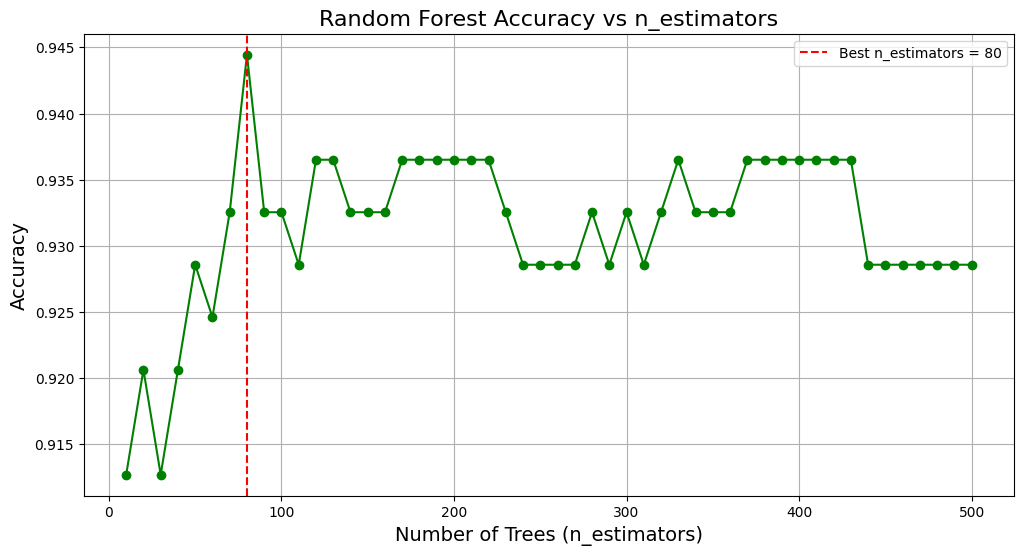

In [47]:
estimators = range(10, 501, 10)  
accuracies = []

for n in estimators:
    rf_clf = RandomForestClassifier(
        n_estimators=n,
        max_depth=10,          
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 6. Find best n_estimators
best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

# 7. Plot accuracy vs n_estimators
plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="green")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("Random Forest Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Trees (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [48]:
rf_clf = RandomForestClassifier(
    n_estimators=80,        
    max_depth=10,          
    class_weight="balanced", 
    random_state=42,
    n_jobs=-1                
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [49]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 1, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [50]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Confusion Matrix:
 [[58  0  1  6]
 [ 0 62  1  0]
 [ 0  0 60  0]
 [ 2  3  1 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.95      0.98      0.97        63
           2       0.95      1.00      0.98        60
           3       0.91      0.91      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.94      0.94      0.94       252



## Gradient Boost

Best accuracy: 0.9524 at max_depth = 8


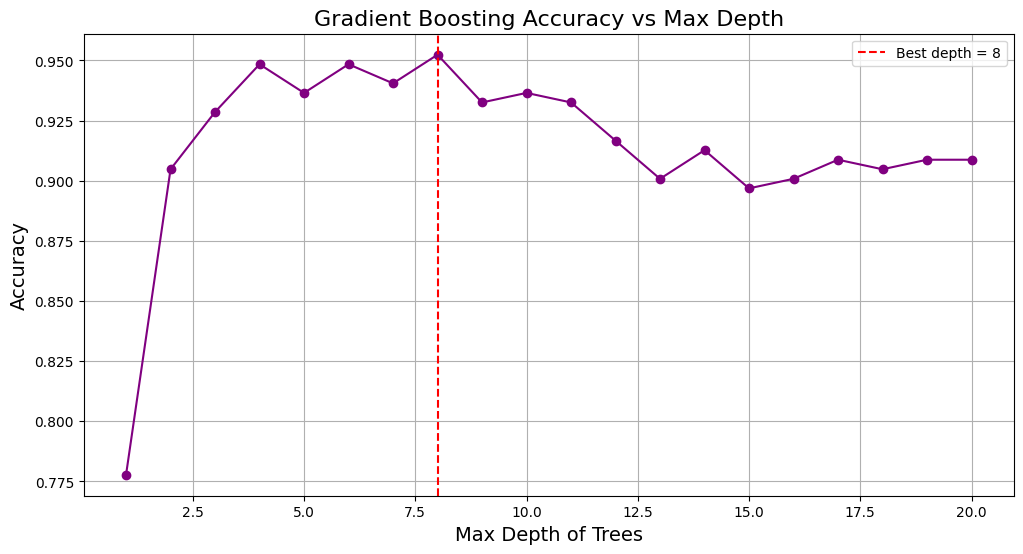

In [51]:
depths = range(1, 21)   
accuracies = []

for d in depths:
    gb_clf = GradientBoostingClassifier(
        n_estimators=300,     
        learning_rate=0.05,   
        max_depth=d,         
        random_state=42
    )
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")

plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="purple")
plt.axvline(best_depth, color="red", linestyle="--", label=f"Best depth = {best_depth}")
plt.title("Gradient Boosting Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth of Trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Best accuracy: 0.9524 at n_estimators = 300


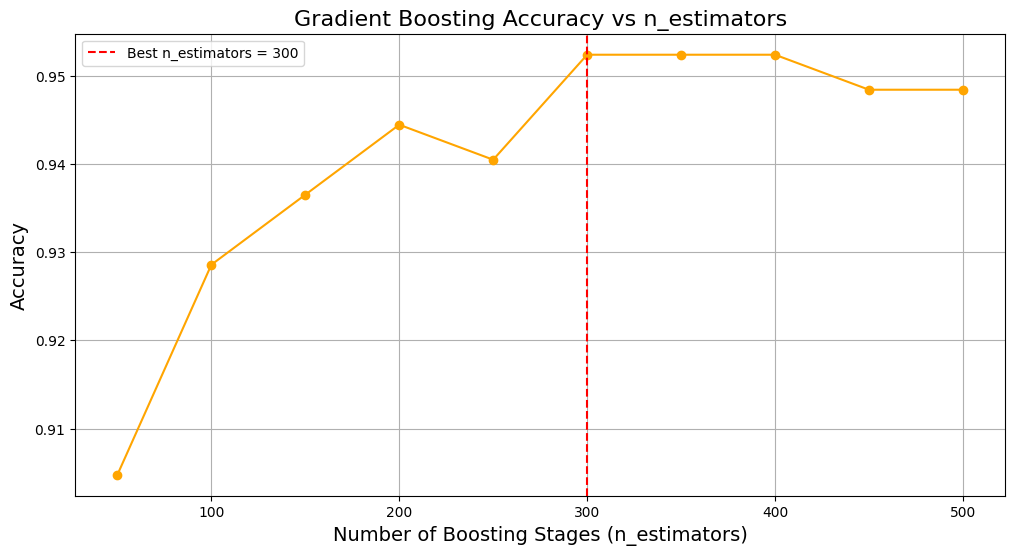

In [52]:
estimators = range(50, 501, 50)   
accuracies = []

for n in estimators:
    gb_clf = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=0.05,   
        max_depth=8,          
        random_state=42
    )
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="orange")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("Gradient Boosting Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Boosting Stages (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [53]:
gb_clf = GradientBoostingClassifier(
    n_estimators=300,      
    learning_rate=0.05,     
    max_depth=8,            
    random_state=42
)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=300,
                           random_state=42)

In [54]:
gb_pred = gb_clf.predict(X_test)
gb_pred

array([2, 2, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 0, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

Confusion Matrix:
 [[60  0  1  4]
 [ 0 60  2  1]
 [ 0  1 59  0]
 [ 1  1  1 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.97      0.95      0.96        63
           2       0.94      0.98      0.96        60
           3       0.92      0.95      0.94        64

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



## XG Boost

Best accuracy: 0.9484 at max_depth = 7


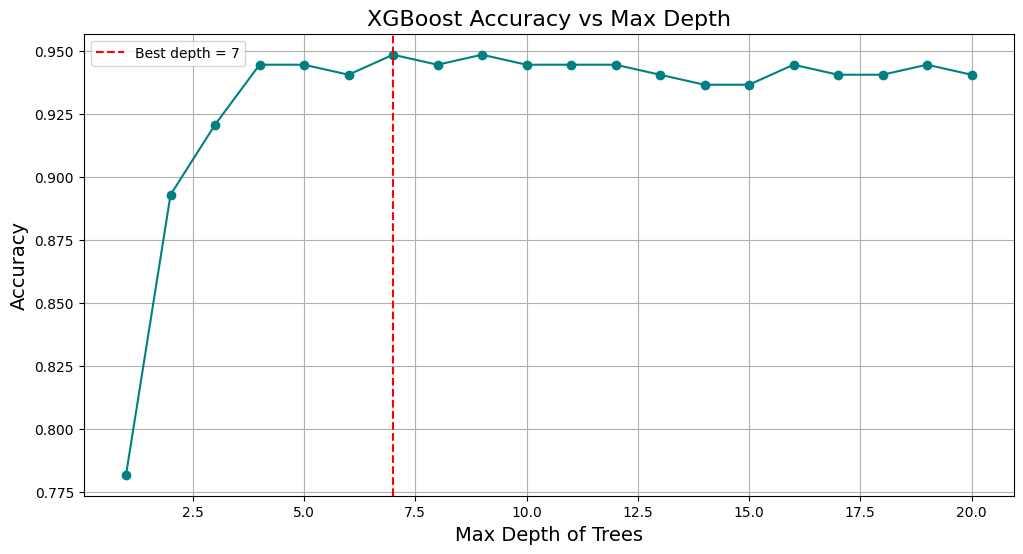

In [56]:
depths = range(1, 21)   
accuracies = []

for d in depths:
    xgb_clf = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=d,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=len(y.unique()),
        random_state=42,
        eval_metric="mlogloss"
    )
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")


plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="teal")
plt.axvline(best_depth, color="red", linestyle="--", label=f"Best depth = {best_depth}")
plt.title("XGBoost Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth of Trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Best accuracy: 0.9484 at n_estimators = 300


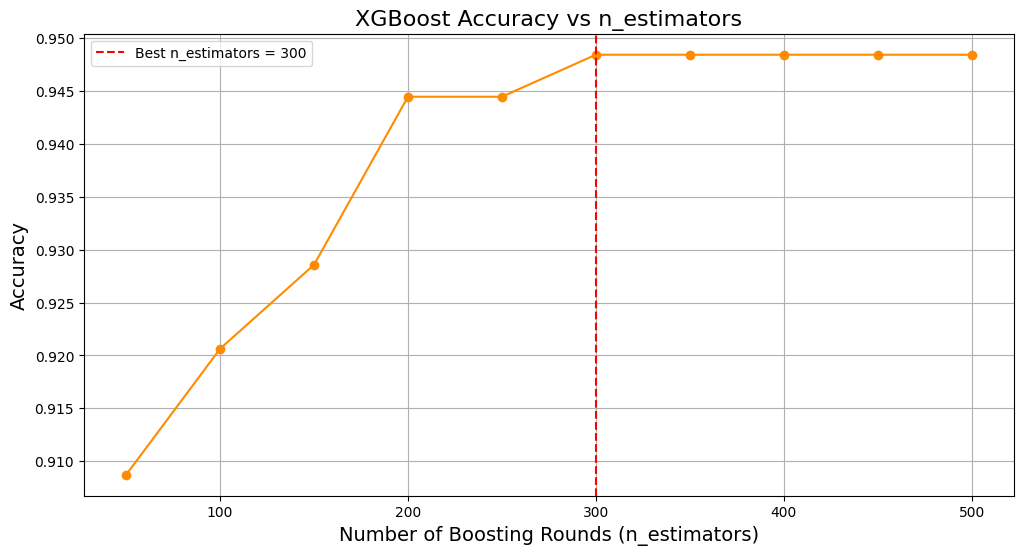

In [57]:
estimators = range(50, 501, 50)   
accuracies = []

for n in estimators:
    xgb_clf = XGBClassifier(
        n_estimators=n,
        learning_rate=0.05,
        max_depth=7,             
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=len(y.unique()),
        random_state=42,
        eval_metric="mlogloss"
    )
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="darkorange")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("XGBoost Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Boosting Rounds (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [58]:
xgb_clf = XGBClassifier(
    n_estimators=300,        
    learning_rate=0.05,     
    max_depth=7,            
    subsample=0.8,           
    colsample_bytree=0.8,    
    objective="multi:softmax", 
    num_class=len(y.unique()), 
    random_state=42,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [59]:
XG_pred = xgb_clf.predict(X_test)
XG_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 1, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [60]:
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Confusion Matrix:
 [[59  0  1  5]
 [ 0 61  1  1]
 [ 0  1 59  0]
 [ 1  2  1 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        65
           1       0.95      0.97      0.96        63
           2       0.95      0.98      0.97        60
           3       0.91      0.94      0.92        64

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



# Comaprison / Best Model

In [61]:
print("Random Forest:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n",'\n', classification_report(y_test, rf_pred))

print('Gradient Boost:\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

print('XGBoost:\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Random Forest:

Confusion Matrix:
 [[58  0  1  6]
 [ 0 62  1  0]
 [ 0  0 60  0]
 [ 2  3  1 58]]

Classification Report:
 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.95      0.98      0.97        63
           2       0.95      1.00      0.98        60
           3       0.91      0.91      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.94      0.94      0.94       252

Gradient Boost:

Confusion Matrix:
 [[60  0  1  4]
 [ 0 60  2  1]
 [ 0  1 59  0]
 [ 1  1  1 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.97      0.95      0.96        63
           2       0.94      0.98      0.96        60
           3       0.92      0.95      0.94        64

    accuracy                           0.95     

In [62]:
print('The Final best accuracy is recieved by gradient boost which is 95.24 %')

The Final best accuracy is recieved by gradient boost which is 95.24 %


In [63]:
data.head(250)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
245,7.0,10.0,9.0,9.0,26.0,red
246,6.9,136.0,6.0,6.0,-121.0,yellow
247,6.6,212.0,6.0,4.0,-30.0,green
248,6.7,27.0,7.0,5.0,-76.0,green


In [64]:
sample = np.array([[6.4	,20.0	,6.0	,6.0	,700.0]])
sample_scaled = scaler.transform(sample)
sample_scaled

d:\Internship\Evenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.56176435, -0.29583939, -0.42784609, -0.67333717, 11.39452796]])

In [65]:
sample_pred=gb_clf.predict(sample_scaled)
sample_pred

array([3])

In [66]:
decoded_labels = le.inverse_transform(sample_pred)
decoded_labels

array(['yellow'], dtype=object)

In [67]:
with open("gb_model.pkl", "wb") as f:
    pickle.dump(gb_clf, f)
